In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataset


In [2]:
data = pd.read_csv('weather.csv', index_col='Unnamed: 0')
data.head(5)

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source
0,2020-05-16,1589562000,96.1,77.7,87.1,107.4,77.7,98.7,77.9,75.9,...,05:30:50,1589581850,18:08:28,1589627308,0.79,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"['48894099999', '48900099999', 'VVTS']",obs
1,2020-05-17,1589648400,96.1,84.1,88.1,105.1,94.1,98.6,75.9,68.7,...,05:30:40,1589668240,18:08:41,1589713721,0.82,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"['48894099999', '48900099999', 'VVTS']",obs
2,2020-05-18,1589734800,97.9,83.1,89.3,105.6,93.9,100.8,76.4,68.0,...,05:30:31,1589754631,18:08:55,1589800135,0.85,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"['48894099999', '48900099999', 'VVTS']",obs
3,2020-05-19,1589821200,99.0,79.5,86.9,107.3,79.5,96.3,76.1,73.2,...,05:30:22,1589841022,18:09:09,1589886549,0.88,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"['48894099999', '48900099999', 'VVTS']",obs
4,2020-05-20,1589907600,91.4,80.6,84.0,109.6,87.7,95.8,79.0,85.0,...,05:30:14,1589927414,18:09:24,1589972964,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"['48894099999', '48900099999', 'VVTS']",obs


## Exploratory data analysis

In [3]:
data.shape


(999, 32)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 998
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        999 non-null    object 
 1   datetimeEpoch   999 non-null    int64  
 2   tempmax         999 non-null    float64
 3   tempmin         999 non-null    float64
 4   temp            999 non-null    float64
 5   feelslikemax    999 non-null    float64
 6   feelslikemin    999 non-null    float64
 7   feelslike       999 non-null    float64
 8   dew             999 non-null    float64
 9   humidity        999 non-null    float64
 10  precip          999 non-null    float64
 11  precipprob      999 non-null    float64
 12  precipcover     999 non-null    float64
 13  snow            999 non-null    float64
 14  snowdepth       999 non-null    float64
 15  windspeed       999 non-null    float64
 16  winddir         999 non-null    float64
 17  cloudcover      999 non-null    float64


In [5]:
data.columns

Index(['datetime', 'datetimeEpoch', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windspeed',
       'winddir', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy',
       'uvindex', 'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch',
       'moonphase', 'conditions', 'description', 'icon', 'stations', 'source'],
      dtype='object')

In [6]:
import plotly.express as px


In [7]:
def show_bar_singe(x, y, title=None):
    
    df = pd.DataFrame({'x': x, 'y': y})
    px.bar(
        df,
        x= 'x',
        y= 'y',
        text_auto='.s',
        color='x',
        title=title
    ).show()

In [8]:
def show_bar(data_sub):
    x = []
    y = []
    for name_col in data_sub.columns:
        if data_sub[name_col].isnull().sum() > 0:
            # print(f'{name_col}  has {data_sub[name_col].isnull().sum()} is null')
            x.append(name_col)
            y.append(data_sub[name_col].isnull().sum())
    df = pd.DataFrame({'x': x, 'y': y})
    px.bar(
        df,
        x= 'x',
        y= 'y',
        text_auto='.s',
        color='x'
    ).show()

In [9]:
data = data.drop(data[data.precip.isnull()].index, axis=0)
data.head(5)

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source
0,2020-05-16,1589562000,96.1,77.7,87.1,107.4,77.7,98.7,77.9,75.9,...,05:30:50,1589581850,18:08:28,1589627308,0.79,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"['48894099999', '48900099999', 'VVTS']",obs
1,2020-05-17,1589648400,96.1,84.1,88.1,105.1,94.1,98.6,75.9,68.7,...,05:30:40,1589668240,18:08:41,1589713721,0.82,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"['48894099999', '48900099999', 'VVTS']",obs
2,2020-05-18,1589734800,97.9,83.1,89.3,105.6,93.9,100.8,76.4,68.0,...,05:30:31,1589754631,18:08:55,1589800135,0.85,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"['48894099999', '48900099999', 'VVTS']",obs
3,2020-05-19,1589821200,99.0,79.5,86.9,107.3,79.5,96.3,76.1,73.2,...,05:30:22,1589841022,18:09:09,1589886549,0.88,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"['48894099999', '48900099999', 'VVTS']",obs
4,2020-05-20,1589907600,91.4,80.6,84.0,109.6,87.7,95.8,79.0,85.0,...,05:30:14,1589927414,18:09:24,1589972964,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"['48894099999', '48900099999', 'VVTS']",obs


In [10]:
data.datetime = pd.to_datetime(data.datetime)


In [11]:
data['week'] = data.datetime.dt.weekday
data['month'] = data.datetime.dt.month
data['year'] = data.datetime.dt.year

In [12]:
data.drop('datetime', inplace=True, axis=1)


In [13]:
data.head(5)


,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sunsetEpoch,moonphase,conditions,description,icon,stations,source,week,month,year
0,1589562000,96.1,77.7,87.1,107.4,77.7,98.7,77.9,75.9,1.0,...,1589627308,0.79,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"['48894099999', '48900099999', 'VVTS']",obs,5,5,2020
1,1589648400,96.1,84.1,88.1,105.1,94.1,98.6,75.9,68.7,1.0,...,1589713721,0.82,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"['48894099999', '48900099999', 'VVTS']",obs,6,5,2020
2,1589734800,97.9,83.1,89.3,105.6,93.9,100.8,76.4,68.0,1.0,...,1589800135,0.85,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"['48894099999', '48900099999', 'VVTS']",obs,0,5,2020
3,1589821200,99.0,79.5,86.9,107.3,79.5,96.3,76.1,73.2,1.0,...,1589886549,0.88,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"['48894099999', '48900099999', 'VVTS']",obs,1,5,2020
4,1589907600,91.4,80.6,84.0,109.6,87.7,95.8,79.0,85.0,1.0,...,1589972964,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"['48894099999', '48900099999', 'VVTS']",obs,2,5,2020


## Check oulier in number variable


In [14]:
data.feelslikemax.dtype == 'float64'

True

In [15]:
number_var  = [var for var in data.columns if data[var].dtype == 'float64']

In [16]:
def show_ourlies(data_sub):
    x = []
    y = []
    for name_col in data_sub.columns:
        desc  = data_sub[name_col].describe()
        
        iqr = desc['75%'] - desc['25%']
        lower_bound = desc['25%'] - 1.5 * iqr
        upper_bound = desc['75%'] + 1.5 * iqr
        outliers = data_sub[(data_sub[name_col] < lower_bound) | (data_sub[name_col] > upper_bound)]
        if len(outliers) > 0:
            x.append(name_col)
            y.append(len(outliers))

    show_bar_singe(x, y, title = "Statistic columns be Outlier")

In [17]:
show_ourlies(data[number_var])

In [18]:
data.isna().sum()

datetimeEpoch     0
tempmax           0
tempmin           0
temp              0
feelslikemax      0
feelslikemin      0
feelslike         0
dew               0
humidity          0
precip            0
precipprob        0
precipcover       0
snow              0
snowdepth         0
windspeed         0
winddir           0
cloudcover        0
visibility        0
solarradiation    0
solarenergy       0
uvindex           0
sunrise           0
sunriseEpoch      0
sunset            0
sunsetEpoch       0
moonphase         0
conditions        0
description       0
icon              0
stations          0
source            0
week              0
month             0
year              0
dtype: int64

In [19]:
number_var

['tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'precipprob',
 'precipcover',
 'snow',
 'snowdepth',
 'windspeed',
 'winddir',
 'cloudcover',
 'visibility',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'moonphase']

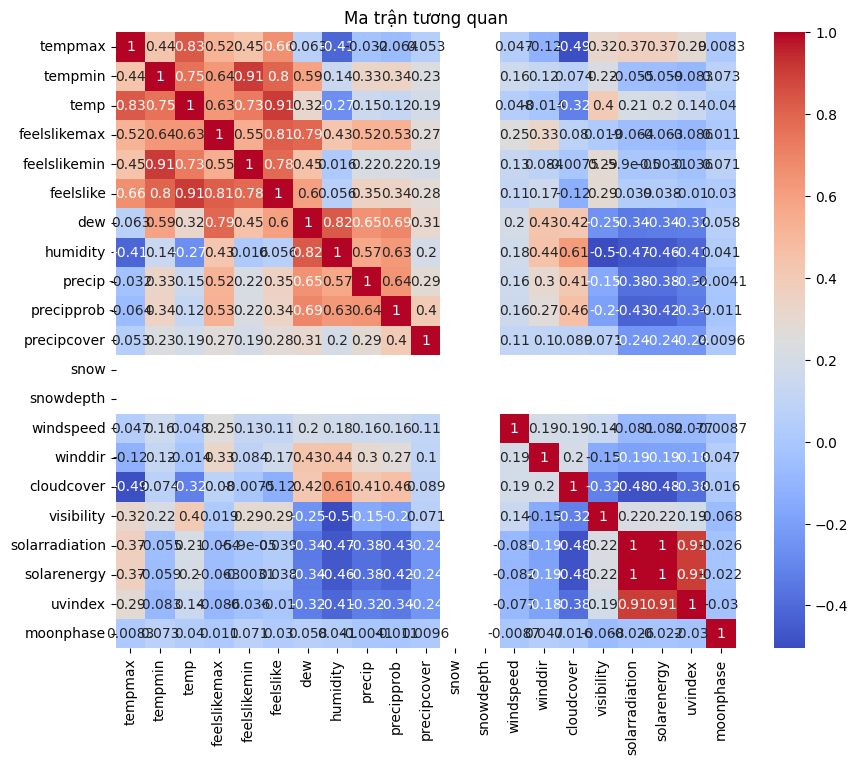

In [20]:
corr_matrix = data[number_var].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

## Split data


Dựa vào danh sách các trường được đưa ra, có vẻ như đây là một danh sách các thuộc tính hoặc cột trong dữ liệu thời tiết. Dưới đây là giải thích cho mỗi trường:

- datetimeEpoch: Thời gian đo đạc dưới dạng số epoch, tức là số giây tính từ ngày 1/1/1970.
- tempmax: Nhiệt độ tối đa trong ngày (đơn vị đo thường là độ Celsius hoặc Fahrenheit).
- tempmin: Nhiệt độ tối thiểu trong ngày (đơn vị đo thường là độ Celsius hoặc Fahrenheit).
- temp: Nhiệt độ hiện tại (đơn vị đo thường là độ Celsius hoặc Fahrenheit).
- feelslikemax: Nhiệt độ cảm nhận tối đa trong ngày, tức là cảm giác nhiệt độ do tác động của yếu tố như gió (đơn vị đo thường là độ - - -
-  Celsius hoặc Fahrenheit).
- feelslikemin: Nhiệt độ cảm nhận tối thiểu trong ngày (đơn vị đo thường là độ Celsius hoặc Fahrenheit).
- feelslike: Nhiệt độ cảm nhận hiện tại (đơn vị đo thường là độ Celsius hoặc Fahrenheit).
- dew: Độ ẩm sương (đơn vị đo thường là độ Celsius hoặc Fahrenheit).
- humidity: Độ ẩm (phần trăm).
- precip: Lượng mưa dự kiến (đơn vị đo thường là mm hoặc inch).
- precipprob: Xác suất mưa (phần trăm).
- precipcover: Tỷ lệ bề mặt được che phủ bởi mưa (phần trăm).
- snow: Lượng tuyết dự kiến (đơn vị đo thường là mm hoặc inch).
- snowdepth: Độ dày tuyết hiện tại (đơn vị đo thường là mm hoặc inch).
- windspeed: Tốc độ gió (đơn vị đo thường là km/h hoặc mph).
- winddir: Hướng gió (theo độ).
- cloudcover: Tỷ lệ bề mặt được che phủ bởi mây (phần trăm).
- visibility: Tầm nhìn (đơn vị đo thường là km hoặc mile).
- solarradiation: Bức xạ mặt trời (đơn vị đo thường là watts/m²).
- solarenergy: Năng lượng mặt trời (đơn vị đo thường là joules hoặc kilocalories).
- uvindex: Chỉ số UV (mức độ tử ngoại).
- uvindex: Chỉ số UV (mức độ tử ngoại). Chỉ số này thường được sử dụng để đo mức độ mạnh của tia tử ngoại mặt trời. Giá trị của chỉ số UV thường nằm trong một phạm vi từ 0 đến 11+ hoặc có thể được chia thành các mức độ như thấp, trung bình, cao và rất cao. Mức độ UV cao có thể gây tổn hại cho da và mắt, vì vậy việc kiểm tra chỉ số UV có thể giúp người dùng đưa ra quyết định về việc bảo vệ khỏi tác động của tia tử ngoại.

- sunrise: Thời gian mặt trời mọc trong ngày.

- sunriseEpoch: Thời gian mặt trời mọc trong ngày dưới dạng số epoch.

- sunset: Thời gian mặt trời lặn trong ngày.

- sunsetEpoch: Thời gian mặt trời lặn trong ngày dưới dạng số epoch.

- moonphase: Pha của mặt trăng (thường được biểu thị bằng từ "New", "First Quarter", "Full" và "Last Quarter" hoặc dưới dạng phần trăm).

- conditions: Điều kiện thời tiết tổng quát, chẳng hạn như "trời nhiều mây" hoặc "trời nắng".

- description: Mô tả chi tiết về điều kiện thời tiết.

- icon: Biểu tượng đại diện cho điều kiện thời tiết, thường được sử dụng để hiển thị trên các biểu đồ hoặc giao diện người dùng.

- stations: Các trạm quan trắc thời tiết gần địa điểm cụ thể.

- source: Nguồn dữ liệu thời tiết, chẳng hạn như Weather.com, AccuWeather.com, hay The Weather Channel.

- week: Tuần trong năm.

- month: Tháng trong năm.

- year: Năm.

In [21]:
data.columns

Index(['datetimeEpoch', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch', 'moonphase',
       'conditions', 'description', 'icon', 'stations', 'source', 'week',
       'month', 'year'],
      dtype='object')

In [22]:
feature = ['tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity',
       'snowdepth', 'windspeed', 'winddir',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
        'moonphase',
         'week',
       'month', ]

In [23]:
X = data[feature]
y = data['precip']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Model

In [25]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=2)
    auc_score = auc(fpr, tpr)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')
    print(f'AUC score : {f1:.2f}')
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Không mưa','Có mưa'])
    disp.plot()
    plt.show()

> ### Logistic Regression

In [26]:
from sklearn.linear_model import  LogisticRegression
logreg = LogisticRegression(C=1, solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [27]:
y_pred = logreg.predict(X_test)

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 score: 0.89
AUC score : 0.89


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1015: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



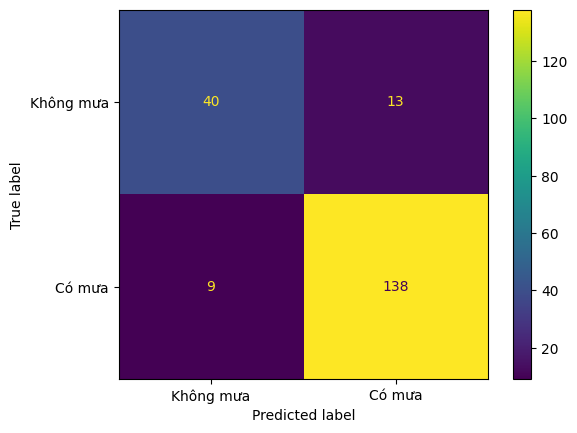

In [28]:
evaluate(y_test, y_pred)

> ### SVM

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model_svm = SVC()

model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 score: 0.84
AUC score : 0.84


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1015: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



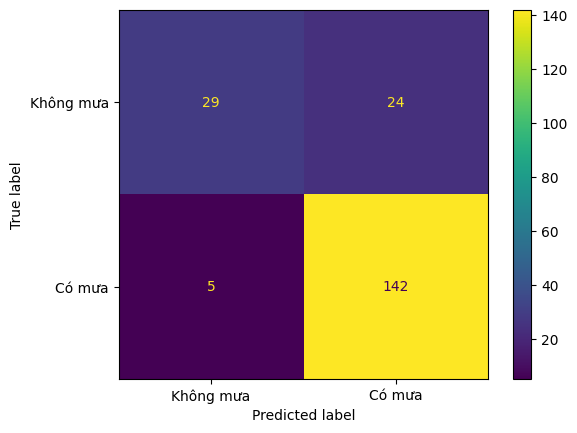

In [30]:
evaluate(y_test, y_pred)

> ### RandomForest Classifier

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

randomForest = RandomForestClassifier(n_estimators=100)

randomForest.fit(X_train, y_train)

y_pred = randomForest.predict(X_test)

Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 score: 0.87
AUC score : 0.87


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1015: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



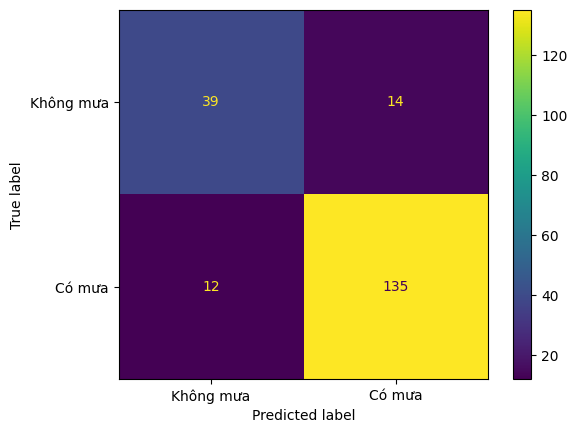

In [32]:
evaluate(y_test, y_pred)